In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
mushrooms = pd.read_csv("secondary_data.csv", sep = ";")

In [3]:
mushrooms.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# Shape of the dataset, response variable and feature names, data type of each column
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
df = pd.DataFrame({"Feature": mushrooms.columns[1:],
              "Data Type": mushrooms.dtypes[1:]}).reset_index(drop = True)

def change(x):
    return "categorical" if x == "object" else "numeric"

# Use apply with lambda function to apply change function to each element in the "Data Type" column
df["Data Type"] = df["Data Type"].apply(lambda x: change(x))

def unique_factors(col):
    if col["Data Type"] == "categorical":
        unique_vals = mushrooms[col["Feature"]].dropna().unique() # Exclude NaN values
        return ', '.join(str(val) for val in unique_vals)
    else:
        return ''

df["Factor Labels"] = df.apply(unique_factors, axis=1)

df

,Feature,Data Type,Factor Labels
0,cap-diameter,numeric,
1,cap-shape,categorical,"x, f, p, b, c, s, o"
2,cap-surface,categorical,"g, h, t, y, e, s, l, d, w, i, k"
3,cap-color,categorical,"o, e, n, g, r, w, y, p, u, b, l, k"
4,does-bruise-or-bleed,categorical,"f, t"
5,gill-attachment,categorical,"e, a, d, s, x, p, f"
6,gill-spacing,categorical,"c, d, f"
7,gill-color,categorical,"w, n, p, u, b, g, y, r, e, o, k, f"
8,stem-height,numeric,
9,stem-width,numeric,


In [6]:
# Summary statistics for the numeric features
mushrooms.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [7]:
# Count the number of missing values within each column
mushrooms.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
# Label encoding the response variable and categorical features
le = LabelEncoder()
mask = mushrooms.isna()
cols_to_encode = mushrooms.columns.drop(["cap-diameter", "stem-width", "stem-height"])

for col in cols_to_encode:
    mushrooms[col] = le.fit_transform(mushrooms[col])

mushrooms = mushrooms.where(~ mask, np.nan)

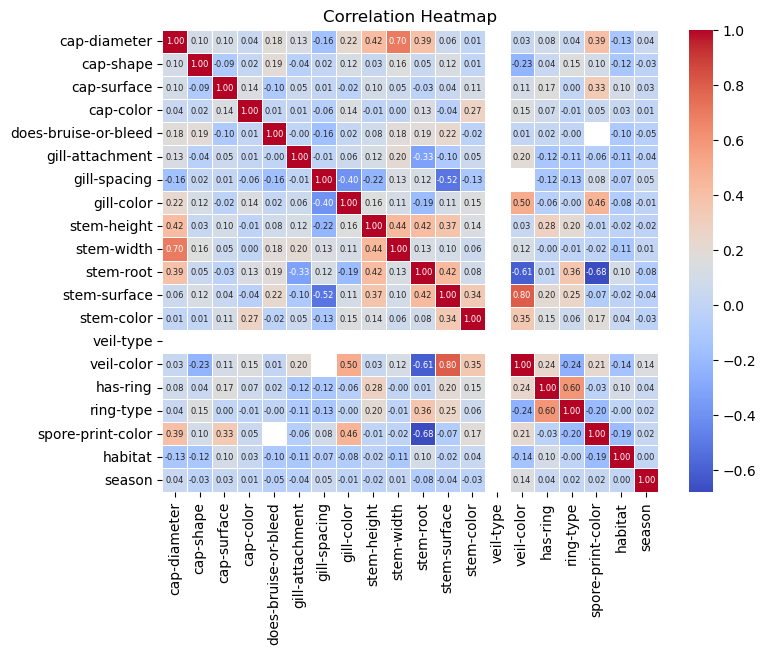

In [9]:
# Correlation heatmap of the features
correlation_matrix = mushrooms.drop('class', axis=1).corr(method = "pearson")
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# veil-type only has 1 categorical value ("u") or it is missing in the dataset.update_display.
# So we will remove it from the analysis since it probably doesn't strongly contribute to the variation
# in the response 

# I THINK ITS OK TO REMOVE THIS VARIABLE, WHAT DO YOU THINK???

# mushrooms = mushrooms.drop(columns = ["veil-type"])

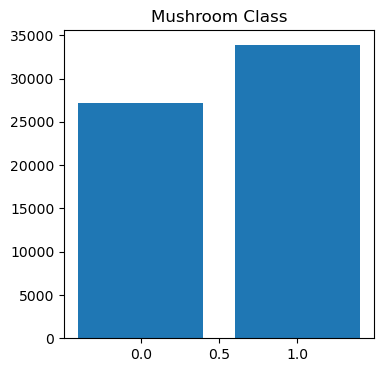

In [16]:
plt.figure(figsize = (4,4))
plt.bar(mushrooms["class"].value_counts().index, mushrooms["class"].value_counts().values)
plt.title("Mushroom Class")
plt.show()

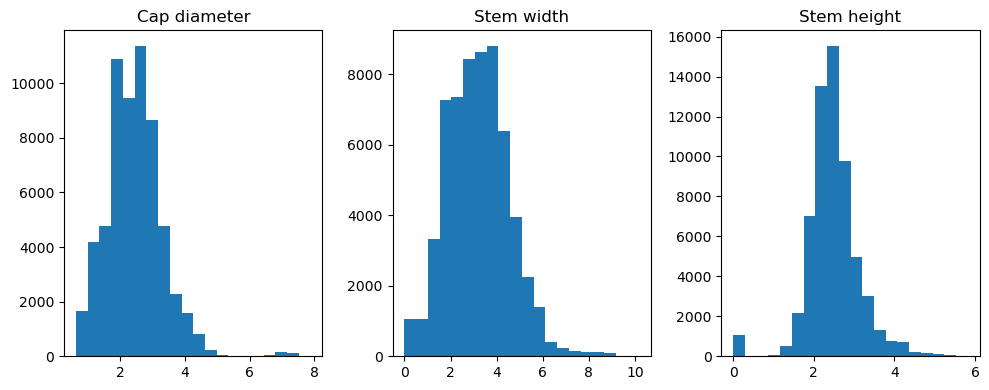

In [11]:
class_counts = mushrooms["class"].value_counts()
fig, axis = plt.subplots(1,3, figsize=(10, 4))

axis[0].hist(np.sqrt(mushrooms["cap-diameter"]), bins=20)
axis[0].set_title("Cap diameter")

axis[1].hist(np.sqrt(mushrooms["stem-width"]), bins=20)
axis[1].set_title("Stem width")

axis[2].hist(np.sqrt(mushrooms["stem-height"]), bins=20)
axis[2].set_title("Stem height")


plt.tight_layout()

plt.show()

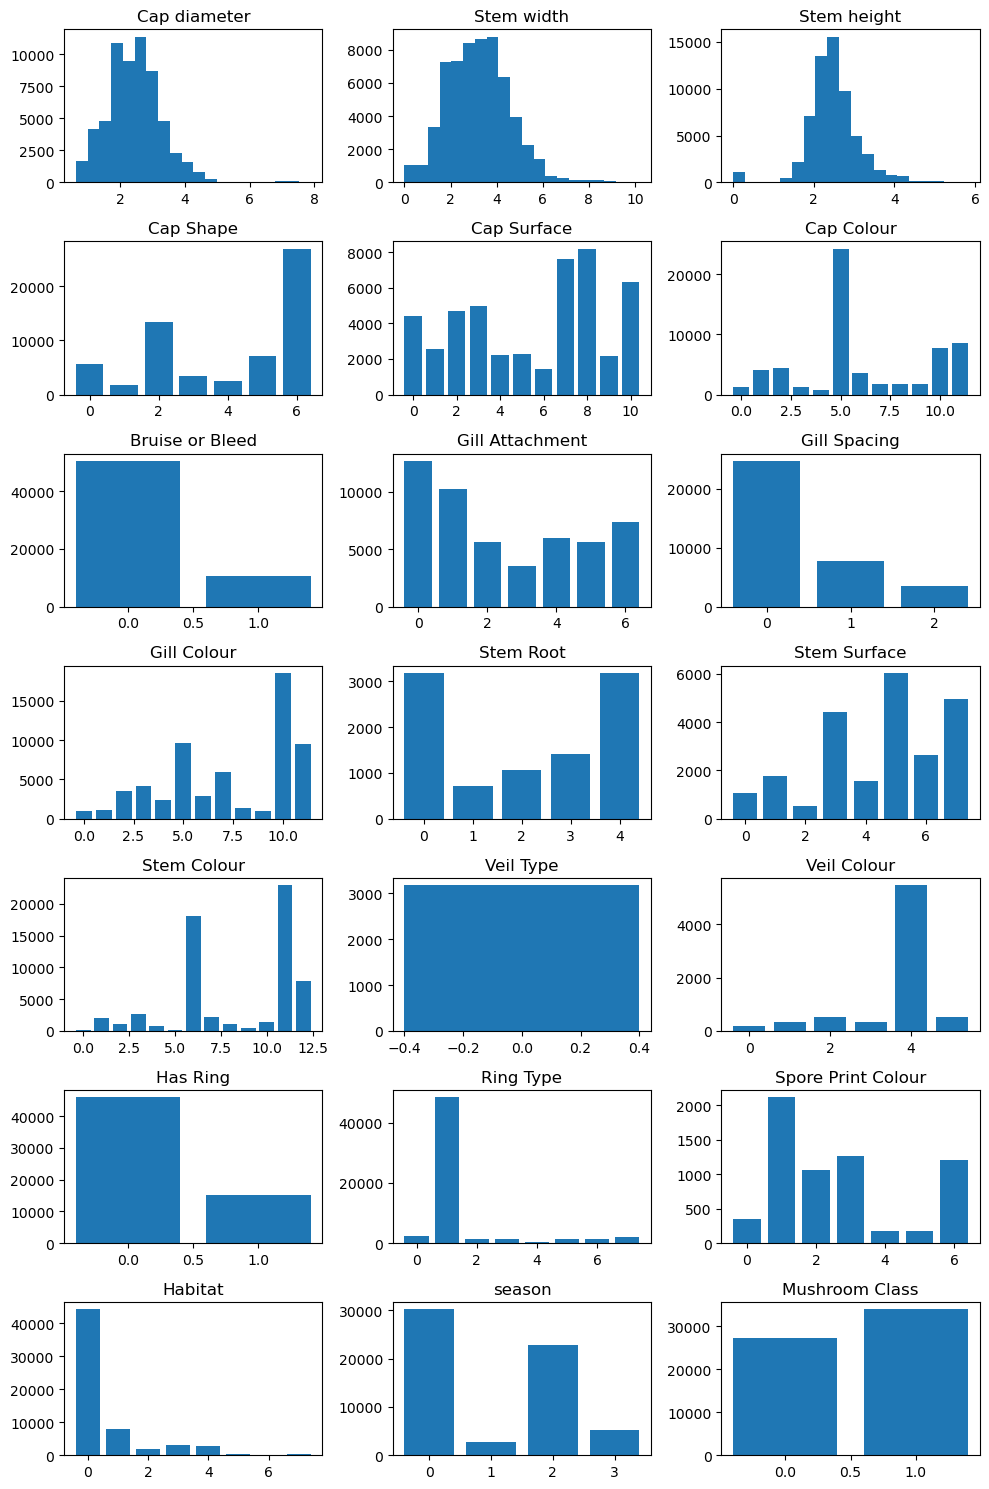

In [12]:
fig, axis = plt.subplots(7,3, figsize=(10,15))

axis[0,0].hist(np.sqrt(mushrooms["cap-diameter"]), bins=20)
axis[0,0].set_title("Cap diameter")

axis[0,1].hist(np.sqrt(mushrooms["stem-width"]), bins=20)
axis[0,1].set_title("Stem width")

axis[0,2].hist(np.sqrt(mushrooms["stem-height"]), bins=20)
axis[0,2].set_title("Stem height")

axis[1,0].bar(mushrooms["cap-shape"].value_counts().index, mushrooms["cap-shape"].value_counts().values)
axis[1,0].set_title("Cap Shape")

axis[1,1].bar(mushrooms["cap-surface"].value_counts().index, mushrooms["cap-surface"].value_counts().values)
axis[1,1].set_title("Cap Surface")

axis[1,2].bar(mushrooms["cap-color"].value_counts().index, mushrooms["cap-color"].value_counts().values)
axis[1,2].set_title("Cap Colour")

axis[2,0].bar(mushrooms["does-bruise-or-bleed"].value_counts().index, mushrooms["does-bruise-or-bleed"].value_counts().values)
axis[2,0].set_title("Bruise or Bleed")

axis[2,1].bar(mushrooms["gill-attachment"].value_counts().index, mushrooms["gill-attachment"].value_counts().values)
axis[2,1].set_title("Gill Attachment")

axis[2,2].bar(mushrooms["gill-spacing"].value_counts().index, mushrooms["gill-spacing"].value_counts().values)
axis[2,2].set_title("Gill Spacing")

axis[3,0].bar(mushrooms["gill-color"].value_counts().index, mushrooms["gill-color"].value_counts().values)
axis[3,0].set_title("Gill Colour")

axis[3,1].bar(mushrooms["stem-root"].value_counts().index, mushrooms["stem-root"].value_counts().values)
axis[3,1].set_title("Stem Root")

axis[3,2].bar(mushrooms["stem-surface"].value_counts().index, mushrooms["stem-surface"].value_counts().values)
axis[3,2].set_title("Stem Surface")

axis[4,0].bar(mushrooms["stem-color"].value_counts().index, mushrooms["stem-color"].value_counts().values)
axis[4,0].set_title("Stem Colour")

axis[4,1].bar(mushrooms["veil-type"].value_counts().index, mushrooms["veil-type"].value_counts().values)
axis[4,1].set_title("Veil Type")

axis[4,2].bar(mushrooms["veil-color"].value_counts().index, mushrooms["veil-color"].value_counts().values)
axis[4,2].set_title("Veil Colour")

axis[5,0].bar(mushrooms["has-ring"].value_counts().index, mushrooms["has-ring"].value_counts().values)
axis[5,0].set_title("Has Ring")

axis[5,1].bar(mushrooms["ring-type"].value_counts().index, mushrooms["ring-type"].value_counts().values)
axis[5,1].set_title("Ring Type")

axis[5,2].bar(mushrooms["spore-print-color"].value_counts().index, mushrooms["spore-print-color"].value_counts().values)
axis[5,2].set_title("Spore Print Colour")

axis[6,0].bar(mushrooms["habitat"].value_counts().index, mushrooms["habitat"].value_counts().values)
axis[6,0].set_title("Habitat")

axis[6,1].bar(mushrooms["season"].value_counts().index, mushrooms["season"].value_counts().values)
axis[6,1].set_title("season")

plt.tight_layout()

plt.show()